<a href="https://colab.research.google.com/github/jhkr1/BigDataAnalysis/blob/main/%EC%9E%90%EC%A0%84%EA%B1%B0_%EA%B3%B5%EC%9C%A0_%ED%9A%8C%EC%82%AC%EC%9D%98_%EB%B9%A0%EB%A5%B8_%EC%84%B1%EA%B3%B5%EC%9D%84_%EC%9C%84%ED%95%9C_%EC%A0%84%EB%9E%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자전거 공유 회사의 빠른 성공을 위한 전략_구글 코세라 캡스톤

## 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 가져오기

In [2]:
# df1 = pd.read_csv("/content/drive/MyDrive/Coursera_Google_Capstone/202401-divvy-tripdata.csv")
# df2 = pd.read_csv("/content/drive/MyDrive/Coursera_Google_Capstone/202402-divvy-tripdata.csv")
# df3 = pd.read_csv('/content/drive/MyDrive/Coursera_Google_Capstone/202403-divvy-tripdata.csv')
# df4 = pd.read_csv('/content/drive/MyDrive/Coursera_Google_Capstone/202404-divvy-tripdata.csv')
# df5 = pd.read_csv('/content/drive/MyDrive/Coursera_Google_Capstone/202405-divvy-tripdata.csv')
# df6 = pd.read_csv('/content/drive/MyDrive/Coursera_Google_Capstone/202406-divvy-tripdata.csv')
# df7 = pd.read_csv('/content/drive/MyDrive/Coursera_Google_Capstone/202407-divvy-tripdata.csv')
# df8 = pd.read_csv('/content/drive/MyDrive/Coursera_Google_Capstone/202408-divvy-tripdata.csv')
# df9 = pd.read_csv('/content/drive/MyDrive/Coursera_Google_Capstone/202409-divvy-tripdata.csv')
# df10 = pd.read_csv('/content/drive/MyDrive/Coursera_Google_Capstone/202410-divvy-tripdata.csv')
# df11 = pd.read_csv('/content/drive/MyDrive/Coursera_Google_Capstone/202411-divvy-tripdata.csv')


## 2024년 1월부터 11월까지 데이터 하나로 연결하기

In [7]:
df = pd.concat([df1, df2,df3, df4, df5, df6, df7, df8, df9, df10, df11])
df.head()

NameError: name 'df1' is not defined

## 데이터 탐색하기

In [8]:
# df.info() # 데이터 타입 확인

# df.describe() # 기본 통계 요약

# df.isna().sum() # 열별 결측치 확인 -> 결측치가 존재한다.

# df.duplicated().sum() # 중복된 데이터 확인 -> 중복된 데이터가 존재하지 않는다.

member_casual
member    64.473846
casual    35.526154
Name: proportion, dtype: float64


## df['started_at'], df['ended_at']의 타입 변경(object -> datetime)

In [9]:
# 밀리초 또는 추가 정보 제거
df['started_at'] = df['started_at'].str.split('.', expand=True)[0]
df['ended_at'] = df['ended_at'].str.split('.', expand=True)[0]

# 이제 to_datetime 사용
# errors='coerce' -> 변환 과정에서 오류가 발생할 경우, 에러를 발생시키지 않고 NaT으로 처리
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')

KeyError: 'started_at'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925000 entries, 0 to 2924999
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   rideable_type  object
 1   ride_length    object
 2   day_of_week    object
 3   member_casual  object
dtypes: object(4)
memory usage: 89.3+ MB


## 데이터 프레임에 기존 정보를 이용한 새로운 열 추가하기.

In [ ]:
# 각 주행의 시작 요일 구하기
# datetime 형식 데이터에서 사용가능 -> .dt
# day_name()은 각 날짜에 해당하는 요일을 문자열로 반환
# 예: 2024-01-12 → "Friday"

df['day_of_week'] = df['started_at'].dt.day_name()
df['day_of_week'].head()

In [ ]:
# 주행 시간 구하기
df['ride_length'] = df['ended_at'] - df['started_at']
df['ride_length'].head()

## 데이터 프레임 재구성 하기

In [ ]:
# 우리가 사용할 컬럼(rideable_type, ride_length, member_casual)
df = df[['rideable_type', 'ride_length', 'day_of_week','member_casual']]
# df.isna().sum() # 결측치 X

In [ ]:
df.head()

In [ ]:
df['day_of_week'].value_counts(normalize=True) * 100

## 재구성한 데이터프레임 저장하기

In [ ]:
df.to_csv('divvy_tripdata.csv', index=False)

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Coursera_Google_Capstone/2024-divvy-tripdata.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925000 entries, 0 to 2924999
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   rideable_type  object
 1   ride_length    object
 2   day_of_week    object
 3   member_casual  object
dtypes: object(4)
memory usage: 89.3+ MB


In [15]:
# 저장한 데이터 프레임의 ride_length가 object 타입이여서 timedelta로 변환
df['ride_length'] = pd.to_timedelta(df['ride_length'])

In [17]:
df['ride_length'].head()

,ride_length
0,0 days 00:07:32
1,0 days 00:07:13
2,0 days 00:08:00
3,0 days 00:29:49
4,0 days 00:26:12


## 데이터 분석

In [20]:
# 주행 시작 날짜의 비율
df['day_of_week'].value_counts(normalize=True) * 100


# 연간 회원의 비율
ratio = df['member_casual'].value_counts(normalize=True) * 100
print(ratio) # 연간회원 64.47%, 일반 이용자 35.52%

member_casual
member    64.473846
casual    35.526154
Name: proportion, dtype: float64


In [25]:
# 주행 시간 평균 -> 00:18:05.183608888
df['ride_length'].mean()

# 주행 시간 최댓값 -> 1 days 01:59:56
df['ride_length'].max()

# 주행 시작 날짜의 최빈값 -> Saturday
df['day_of_week'].mode()

Timedelta('0 days 00:18:05.183608888')

In [26]:
# 연간 회원과 일반 이용자의 분리
member_data = df[df['member_casual'] == 'member']
casual_data = df[df['member_casual'] == 'casual']

In [29]:
# 연간 회원의 평균 주행 시간 -> 00:13:12.840299385
member_data['ride_length'].mean()

# 일반 이용자의 평균 주행 시간 -> 00:26:55.736329079
casual_data['ride_length'].mean()

Timedelta('0 days 00:26:55.736329079')

In [39]:
# day_of_weak 별 ride_length의 평균
df.groupby('day_of_week')['ride_length'].mean()


,ride_length
day_of_week,
Friday,5040 days 01:08:23
Monday,4579 days 14:57:23
Saturday,6971 days 15:25:22
Sunday,6008 days 12:23:29
Thursday,4579 days 14:08:00
Tuesday,4490 days 02:42:41
Wednesday,5068 days 10:55:38


In [35]:
# 자전거의 종류별 주행시간의 평균
df.groupby('rideable_type')['ride_length'].mean()

,ride_length
rideable_type,
classic_bike,0 days 00:23:48.440379360
electric_bike,0 days 00:12:33.477586304


## 데이터 시각화

### 1.주행 시작 요일 비율 - 막대 그래프

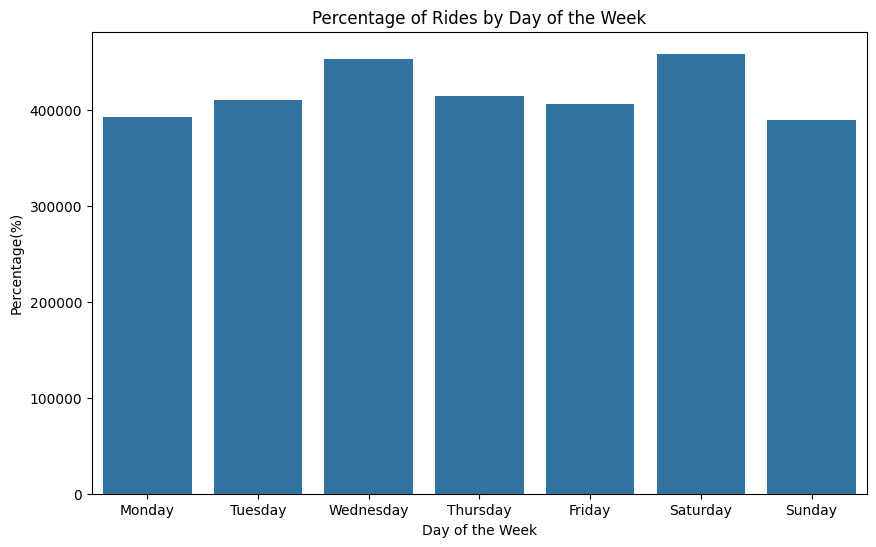

In [44]:
# 요일 순서 지정
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 요일 비율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=df['day_of_week'].value_counts().index, y=df['day_of_week'].value_counts().values, order=day_order)
plt.title("Percentage of Rides by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Percentage(%)")
plt.show()

### 2. 연간 회원과 일반 이용자의 비율 - 원형 그래프 (파이 차트)


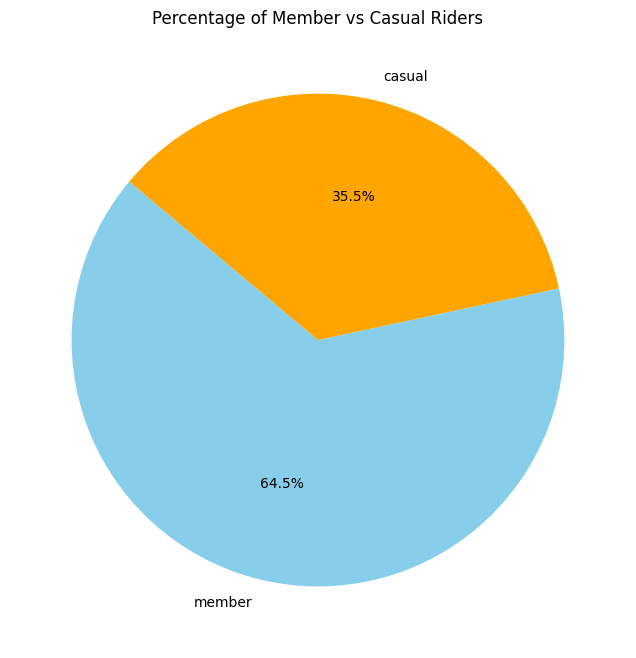

In [45]:
ratio = df['member_casual'].value_counts(normalize=True) * 100
# 파이 차트
plt.figure(figsize=(8, 8))
plt.pie(ratio, labels=ratio.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title("Percentage of Member vs Casual Riders")
plt.show()

### 3. 회원 유형별 평균 주행 시간 - 막대 그래프

<ipython-input-46-133078de427f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=avg_ride_length, palette='viridis')


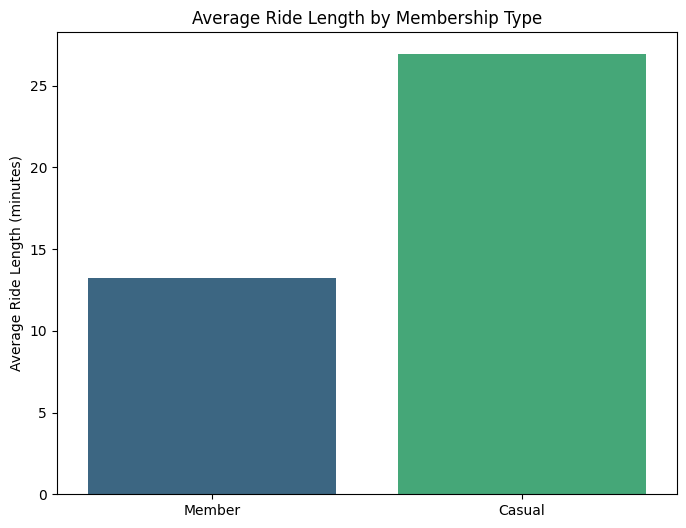

In [46]:
# 평균 주행 시간 비교
# ride_length의 평균을 total_seconds()를 통해 초 단위로 변환 후 /60을 통해 분 단위로 변환
avg_ride_length = [member_data['ride_length'].mean().total_seconds() / 60,
                   casual_data['ride_length'].mean().total_seconds() / 60]
labels = ['Member', 'Casual']

# 시각화
plt.figure(figsize=(8, 6))
# palette='viridis' 색상 팔레트를 지정
sns.barplot(x=labels, y=avg_ride_length, palette='viridis')
plt.title("Average Ride Length by Membership Type")
plt.ylabel("Average Ride Length (minutes)")
plt.show()

### 4. 요일별 평균 주행 시간 - 막대 그래프


<ipython-input-47-25666d1a35c4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_avg_minutes.index, y=day_avg_minutes.values, order=day_order, palette='coolwarm')


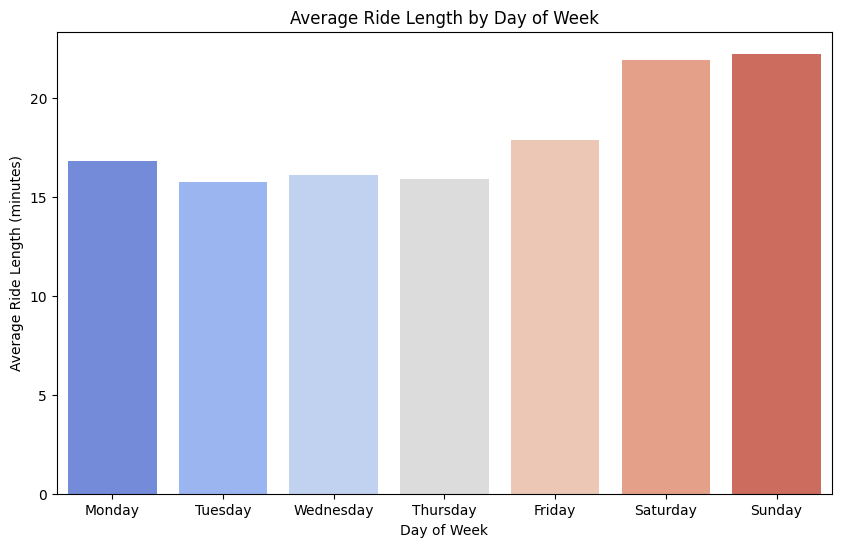

In [47]:
# 요일별 평균 주행 시간 계산
day_avg = df.groupby('day_of_week')['ride_length'].mean()
day_avg_minutes = day_avg.dt.total_seconds() / 60  # 초를 분으로 변환

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=day_avg_minutes.index, y=day_avg_minutes.values, order=day_order, palette='coolwarm')
plt.title("Average Ride Length by Day of Week")
plt.ylabel("Average Ride Length (minutes)")
plt.xlabel("Day of Week")
plt.show()

### 5. 자전거 종류별 평균 주행 시간 - 막대 그래프


<ipython-input-48-209331436b57>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ride_type_avg_minutes.index, y=ride_type_avg_minutes.values, palette='muted')


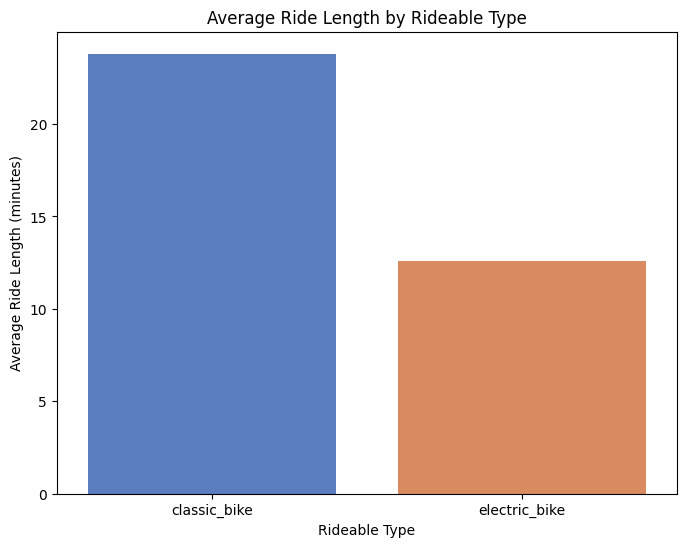

In [48]:
# 자전거 종류별 평균 주행 시간 계산
ride_type_avg = df.groupby('rideable_type')['ride_length'].mean()
ride_type_avg_minutes = ride_type_avg.dt.total_seconds() / 60

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=ride_type_avg_minutes.index, y=ride_type_avg_minutes.values, palette='muted')
plt.title("Average Ride Length by Rideable Type")
plt.ylabel("Average Ride Length (minutes)")
plt.xlabel("Rideable Type")
plt.show()